<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/03_cross_validation_and_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Validation & Hyperparameter Tuning

In this notebook, we will:

- Use K-fold cross-validation
- Tune the Ridge regularization parameter (alpha)
- Visualize validation performance
- Identify optimal model complexity

Goal:
Understand how cross-validation selects model complexity.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

## Step 1: Generate Synthetic Regression Data

We simulate:

- 200 samples
- 30 features
- Some noise
- Moderate multicollinearity

This gives Ridge something meaningful to optimize.


In [2]:
np.random.seed(42)

X, y = make_regression(
    n_samples=200,
    n_features=30,
    n_informative=10,
    noise=15,
    random_state=42
)

## Step 2: Define K-Fold Cross-Validation

We use 5-fold cross-validation.

Why 5?
- Balanced bias–variance tradeoff
- Common practical default


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Step 3: Define Hyperparameter Grid

We test different alpha values:

Small alpha → weak regularization  
Large alpha → strong regularization  

We explore values on a log scale.


In [4]:
alphas = np.logspace(-3, 3, 50)

## Step 4: Evaluate Ridge Across Alpha Values

For each alpha:
- Perform 5-fold CV
- Record average negative MSE

In [5]:
cv_means = []

for alpha in alphas:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])

    scores = cross_val_score(
        model, X, y,
        scoring='neg_mean_squared_error',
        cv=kf
    )

    cv_means.append(-scores.mean())

cv_means = np.array(cv_means)

## Step 5: Plot Validation Curve

We visualize how CV error changes with alpha.

Expected behavior:

- Very small alpha → high variance → higher CV error
- Moderate alpha → optimal balance
- Very large alpha → high bias → higher CV error


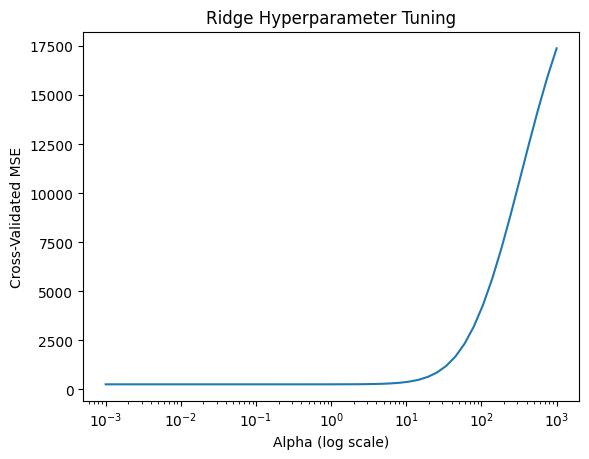

In [6]:
plt.figure()
plt.semilogx(alphas, cv_means)
plt.xlabel("Alpha (log scale)")
plt.ylabel("Cross-Validated MSE")
plt.title("Ridge Hyperparameter Tuning")
plt.show()

## Step 6: Select Optimal Alpha

We choose alpha that minimizes CV error.


In [7]:
best_alpha = alphas[np.argmin(cv_means)]
print("Best alpha:", best_alpha)

Best alpha: 0.3727593720314938


## Observations

- Cross-validation provides an empirical estimate of generalization error.
- Very small alpha under-regularizes (higher variance).
- Very large alpha over-regularizes (higher bias).
- Optimal alpha balances bias and variance.

Key Insight:
Cross-validation operationalizes the bias–variance tradeoff.
